In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
import sympy as sp
from sympy.plotting import plot as spplot
from scipy import interpolate

In [2]:
def createMatrix(m, n=0, maxInt=100):
    #Caso seja entregue um valor para n
    if n:
        return np.random.randint(maxInt, size=(m,n))
    
    #Caso não seja expesificado um valor para 
    else:
        return np.random.randint(maxInt, size=(m,m))

OBS: algumas coisas eu não expliquei porque o método já estava descrito no enunciado

# Decomposição em valores singulares (SVD)

A decomposição SVD de uma matriz $A_{m \times n}$ tem a forma

\begin{equation}
A=U \Sigma V^{T}
\tag{1}
\end{equation}

em que $U$ é uma matriz $m \times n$ ortogonal, $V$ uma matriz também ortogonal com dimensão $n \times n$ e $\Sigma$ uma matriz diagonal $m \times n$ com entradas

\begin{equation}
\sigma_{i j}=\left\{
    \begin{array}{ll}
        0 & \text { para } i \neq j \\
        \sigma_{i} \geq 0 & \text { para } i=j
    \end{array} .\right.
\tag{2}
\end{equation}

Esses valores $\sigma_{i}$ são chamados de valores singulares de $A$ e geralmente são ordenados tais que $\sigma_{i-1} \geq \sigma_{i}, i=$ $2, \cdots, \min \{m, n\}$. Já as colunas de $U$ e $V$ são os vetores singulares a esquerda e a direta, respectivamente. Esta decomposição está diretamente ligada a algoritmos para calcular autovalores e autovetores de matrizes. Os valores singulares de $A$ são as raízes quadradas dos autovalores de $A^{T} A$ e as colunas $U$ e $V$ são os autovetores ortonormais de $A A^{T}$ e $A^{T} A$ respectivamente.

Ainda, para uma matriz simétrica $B_{n \times n}$, a decomposição QR pode ser usada para calcular **todos** os seus autovalores e autovetores usado sucessivas decomposições até que se obtenha uma matriz diagonal (ou muito próxima de uma diagonal). O processo envolvido é

1. $B_{1}=B$ decompõe-se a matriz $B_{1}=Q_{1} R_{1}$

2. $B_{2}=R_{1} Q_{1}$ decompõe-se a matriz $B_{2}=Q_{2} R_{2}$

3. $B_{3}=R_{2} Q_{2}$ e então $B_{3}=Q_{3} R_{3}$

4. Repete-se essas iterações até $B_{k}=R_{k-1} Q_{k-1}$

como trata-se de um processo iterativo, é importante escolher um bom critério de parada. Dentre os critérios mais usados, pode-se limitar o número de iterações $k$ por um máximo de iterações $k_{\text {max }}$, verificar se os elementos da matriz fora da diagonal estão tão próximos de zero quanto se queira usando uma tolerância

\begin{equation}
\max _{i<j}\left\{\left|b_{i j}\right|\right\}<\epsilon
\tag{3}
\end{equation}

ou verificar se $o f f(B)<\epsilon$ em que

\begin{equation}
off(B)=\sqrt{\|B\|_{F}^{2}-\sum_{i=1}^{n} b_{i i}^{2}}
\tag{4}
\end{equation}

Este método é conhecido como método de Francis, ao final do processo iterativo, tem-se

\begin{equation}
B_{k}=V^{T} B V
\tag{5}
\end{equation}

em que $V=Q_{1} Q_{2} \cdots Q_{k-1}$, ou seja, $B$ e $B_{k}$ são matrizes semelhantes e possuem os mesmos autovalores. Além disso, $B_{k}$, como dito anteriormente, converge para uma matriz diagonal, ou seja, os elementos da diagonal de $B_{k}$ fornecem uma aproximação para os autovalores de $B$ e as colunas das matriz $V=Q_{1} Q_{2} \cdots Q_{k-1}$ são aproximações dos respectivos autovetores. O método de Francis pode ser usado para obter a decomposição SVD de uma matriz qualquer $A_{m \times n}$ ao ser aplicado nas matrizes simétricas $A A^{T}$ e $A^{T} A$, uma vez que

- $A A^{T}=\left(U \Sigma V^{T}\right)\left(U \Sigma V^{T}\right)^{T}=U \Sigma\left(V^{T} V\right) \Sigma U^{T}=U \Sigma^{2} U^{T} \mathrm{e}$

- $A^{T} A=\left(U \Sigma V^{T}\right)^{T}\left(U \Sigma V^{T}\right)=V \Sigma\left(U^{T} U\right) \Sigma V^{T}=V \Sigma^{2} V^{T}$

### a)

**Escreva um código implementando o método de Francis usando a função *numpy.linalg.qr* para obter as decomposições $\mathrm{QR}$ necessárias.**

In [3]:
def francis(A, stopPoint = 0.00001):
    n = A.shape[0]
    copyA = np.copy(A)
    V = np.eye(n)
    Eye = np.eye(n)
    #Para a iteração quando o erro for menor do que o permitido
    error = np.ceil(stopPoint) + 1
    while(error > stopPoint):
        (Q,R) = np.linalg.qr(copyA)

        #Encontra a próxima matriz da iteração
        copyA = R @ Q

        #Como V é o produto de todos os Qs das iterações, é possível calcular ele conforme as iterações passam
        V = V @ Q

        #Calcula o erro
        error = np.max(np.abs(np.tril(copyA, -1)))

    # A diagonal principal da matriz resultante (que é, aproximadamente, uma matriz diagonal) são aproximações dos autovalores
    D = copyA.diagonal()
    
    # 'D' possui uma aproximação dos autovalores
    # 'V' possui uma aproximação dos autovetores
    return (D,V)


In [4]:
#Cria uma matriz simétrica
A = createMatrix(3, maxInt=50)
A = A.T + A
print(f'A =\n{A}\n')

(D,V) = francis(A, stopPoint=0.00000000001)
print(f'D =\n{D}\n')
print(f'V =\n{V}')

A =
[[28 39 48]
 [39 90 50]
 [48 50 76]]

D =
[161.48132442  35.03498337  -2.51630778]

V =
[[ 0.4172543  -0.22870349 -0.87954168]
 [ 0.66266758  0.73886942  0.12224422]
 [ 0.62190877 -0.63385068  0.45985083]]


### b)

**Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição SVD de uma matriz qualquer $A_{m \times n}$.**

In [5]:
# Apenas funciona para matrizes em que m >= n, caso seja necessário para matrizes em que m > n, pode-se utilizar a função na transposta
def SVDfrancis(A, stopPoint=0.00001):
    #Calcula qual o tamanho da menor dimensão da matriz
    (m,n) = A.shape

    #Calcula as matrizes 'U' e 'V'
    (D1,U) = francis(  A  @ A.T ,stopPoint)
    (D2,V) = francis( A.T @  A  ,stopPoint)
    
    #Calcula a matriz 'S'
    S = np.zeros((m,n))
    np.fill_diagonal(S, np.sqrt(D2))
    
    return (U,S,V)

In [31]:
#Cria uma matriz
A = createMatrix(4,3)
print(f'A =\n{A}\n')

#Realiza o Método de Francis para encontrar a SVD
(U,S,V) = SVDfrancis(A, stopPoint=0.0000000001)
print(f'U =\n{U}\n')
print(f'S =\n{S}\n')
print(f'V =\n{V}\n')

# Teste
# Algumas vezes o resultado sai errado porque algumas colunas das matrizes U e V (autovetores) estão com os sinais trocados (comparando com a conta do numpy)
# Eu não sei como resolver esse problema (*)
Ak = np.array(U @ S @ V.T)
print(f'Ak =\n{Ak}\n')

# Teste com a versão alternativa para resolver o problema (*)
UAlt = np.array(A @ V @ np.linalg.pinv(S))
print(f'UAlt =\n{UAlt}\n')
AkAlt = np.array(UAlt @ S @ V.T)
print(f'AkAlt =\n{AkAlt}')

A =
[[34  8 12]
 [61 29 43]
 [87 77 75]
 [45 94 77]]

U =
[[ 0.15095974  0.4350468   0.52444004 -0.71617601]
 [ 0.37399761  0.52189834 -0.7510043  -0.15407936]
 [ 0.67650581  0.24449877  0.38868542  0.57574638]
 [ 0.61617923 -0.69179242 -0.09939228 -0.36313576]]

S =
[[203.69368064   0.           0.        ]
 [  0.          46.53760247   0.        ]
 [  0.           0.           5.5799662 ]
 [  0.           0.           0.        ]]

V =
[[ 0.56226858 -0.79007344 -0.24420894]
 [ 0.59925965  0.59278207 -0.53804953]
 [ 0.56986132  0.15618378  0.80676186]]

Ak =
[[ 0.57900528 28.85392242 23.04595223]
 [24.66830811 62.30433786 43.82515327]
 [67.96117212 88.15590801 82.0537322 ]
 [96.14269817 56.4283309  66.04865676]]

UAlt =
[[ 0.15095974 -0.4350468  -0.52444004  0.        ]
 [ 0.37399761 -0.52189834  0.7510043   0.        ]
 [ 0.67650581 -0.24449877 -0.38868542  0.        ]
 [ 0.61617923  0.69179242  0.09939228  0.        ]]

AkAlt =
[[34.  8. 12.]
 [61. 29. 43.]
 [87. 77. 75.]
 [45. 94. 

**\*** Eu encontrei uma forma de resolver o problema das colunas possuirem sinais invertidos no site [educative.io](https://www.educative.io/blog/sign-ambiguity-in-singular-value-decomposition), no entanto, eu não utilizei esse método para calcular a svd porque não gostei da ideia de encontrar o valor de $U$ tentando forçar que o produto $U \Sigma V^{T}$ resulte na matriz $A$ (Isso faz com que as contas cheguem em um valor correto mesmo que os valores encontrados para $\Sigma$ não estejam corretos)

### c)

**Podemos armazenar uma imagem em uma matriz $A_{m \times n}$. Toda imagem consiste em um conjunto de pixels que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em um local específico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um valor entre 0 e 1, em que 0 corresponde ao preto e 1 corresponde ao branco. Assim, uma imagem em escala de cinza com $m \times n$ pixels pode ser armazenada em uma matriz $m \times n$ com valores entre 0 e 1 . Use a função $i m r e a d()$ da biblioteca Matplotlib do Python para carregar uma imagem de uma foto pessoal em escala de cinza. Depois, use as decomposições SVD numpy.linalg.svd e a implementada no ítem 2) para comprimir a imagem, representando-a por $k(k<\min \{m, n\})$ valores singulares, isto é, troque a matriz $A$ por $A_{k}=U[:,: k] * \Sigma[: k,: k] * V^{T}[: k,:]$. Plote a imagem original e a imagem $50 \%$ e $70 \%$ comprimida e compare os resultados. Para tal, use a função imshow(), também da biblioteca Matplotlib.**

In [52]:
def plotCompressedImage(A, compression, U, S, V, title="", cmap="gray"):
    #Impede que seja passado um valor inválido
    comp = min(1, max(0, compression))

    #Encontra o valor de k
    #A partir da seguinte fórmula k*(m+n+1) = (1-comp)*m*n
    (m,n) = A.shape
    k = round(((1-comp)*m*n)/(m+n+1))

    #Calcula a nova imagem
    Ak = U[:,:k] @ S[:k,:k] @ V[:k,:]

    #Imprime a imagem comprimida
    plt.title(title)
    plt.axis('off')
    plt.imshow(Ak, cmap=cmap)

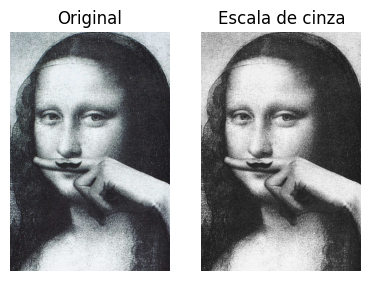

In [51]:
fig = plt.figure(figsize=(7,7))
rows = 1
cols = 3

#Lê a os dados da imagem
#OBS: Essa biblioteca é mais recomendada para leitura de imagens do que a função do MatPlotLib
A = np.asarray(Image.open("imagemM.jpg"))

fig.add_subplot(rows, cols, 1)
plt.title("Original")
plt.axis('off')
plt.imshow(A)

#Converte a imagem para escala de cinza
if len(A.shape) == 3:  #Verifica se a imagem possui cor
    A = np.asarray(color.rgb2gray(A))


fig.add_subplot(rows, cols, 2)
plt.title("Escala de cinza")
plt.axis('off')
plt.imshow(A, cmap="gray")

#Encontra os valores da SVD
#Não foi utilizado o método de Francis, pois ele é muito mais lento, além de não funcionar corretamente para qualquer imagem
(U,Sb,V) = np.linalg.svd(A)
S = np.zeros(A.shape)
np.fill_diagonal(S, Sb)

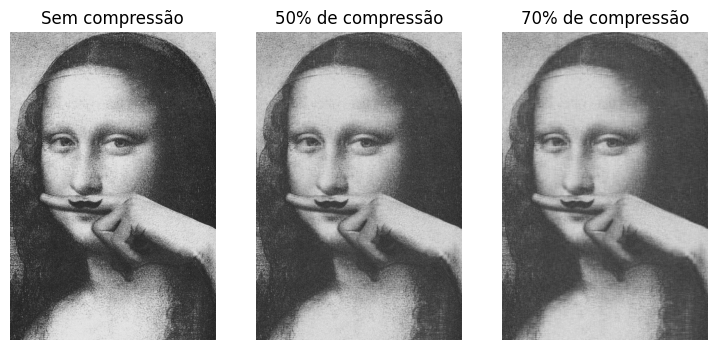

In [53]:
fig = plt.figure(figsize=(9,11))
rows = 1
cols = 3

#Imprime a imagem sem compressão
fig.add_subplot(rows, cols, 1)
plotCompressedImage(A, compression = 0, U=U, S=S, V=V, title="Sem compressão")

#Imprime a imagem com 50% de compressão
fig.add_subplot(rows, cols, 2)
plotCompressedImage(A, compression=0.5, U=U, S=S, V=V, title="50% de compressão")

#Imprime a imagem com 70% de compressão
fig.add_subplot(rows, cols, 3)
plotCompressedImage(A, compression=0.7, U=U, S=S, V=V, title="70% de compressão")

# Interpolação

Para a função

\begin{equation}
f(t)=\frac{1}{1+25 t^{2}}
\tag{6}
\end{equation}

no intervalo $[-1,1]$ faça:

### a)

**Implemente a interpolação de Lagrange e de Newton.**

A forma de Lagrange retorna uma função polinomial no formato

$$
    P_{n}(x) = \sum^{n}_{k=0}y_{k}\ell_{k}
$$

Sendo que:
$$
    \ell_{k}(x) = \prod^{n}_{\substack{i=0\\ i \ne k}} \frac{x-x_{i}}{x_{k}-x_{i}}
$$

In [10]:
def lagrangeInter(xi, yi):
    n = np.size(xi)
    x = sp.Symbol('x')

    # Encontras os valores que são multiplicados pelos 'y's dos dados
    lk = np.array([sp.prod( [ ( (x - xi[i]) / (xi[k] - xi[i]) )
                             for i in np.arange(n) if i != k] ) 
                   for k in np.arange(n)] )
    
    # Encontra a função polinomial aproximada
    fx = np.sum(yi * lk)

    return sp.simplify(fx)

A forma de Newton retorna uma função polinomial no formato

$$
    P_{n}(x) = \sum^{n}_{k=0}\left( \alpha_{k} \prod^{k-1}_{i=0} (x-x_{i})\right)
$$

Sendo que $\alpha$ é calculado pelo método das diferenças divididas:
$$
    \alpha_{k} = f[x_{0}, x_{1}, \dots, x_{k}]
$$

Tendo:
$$
    f[x_{i}, x_{i+1}, \dots, x_{i+k}] := \frac{f[x_{i+1}, x_{i+2}, \dots, x_{i+k}] - f[x_{i}, x_{i+1}, \dots, x_{i+k-1}]} {x_{i+k} - x_{i}}
    \text{, com } f[x_{i}] := f(x_{i})
$$

In [11]:
def newtonInter(xi, yi):
    n = np.size(xi)
    x = sp.Symbol('x')
    
    fx = 0
    f = 1
    
    # Inicializa os valores das diferenças divididas
    # Os valores das diferenças divididas são armazendados da seguinte forma a[i][j] = f[x_i, ..., x_(i+j)]
    a = []
    for i in np.arange(n):
        a.append([0] * n)
        a[i][0] = yi[i]

    # Calcula os valores das diferenças divididas
    for j in np.arange(1,n):
        for i in np.arange(n-j):
            a[i][j] = (a[i+1][j-1] - a[i][j-1]) / (xi[i+j] - xi[i])
    
    # Encontra a função polinomial aproximada
    for i in np.arange(n):
        fx += a[0][i] * f
        f *= (x - xi[i])
        
    return sp.simplify(fx)

### b)

**Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior.**

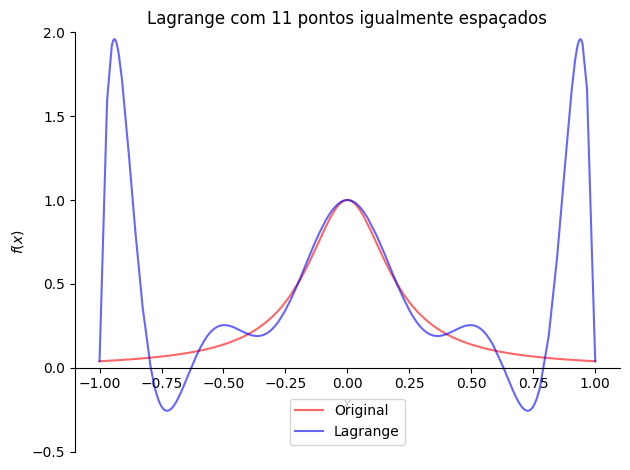

fxLagr = -220.941742081448*x**10 + 1.63868918434673e-13*x**9 + 494.909502262443*x**8 - 2.64455124465712e-13*x**7 - 381.433823529412*x**6 + 3.88578058618805e-15*x**5 + 123.359728506787*x**4 + 1.58206781009085e-14*x**3 - 16.8552036199095*x**2 + 1.11976400374303e-15*x + 1.0


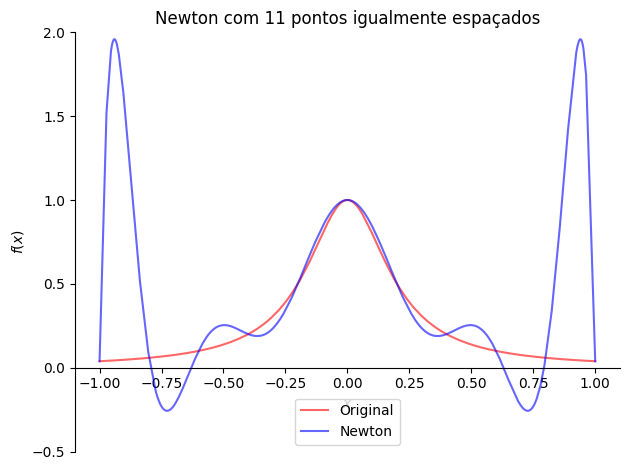

fxNewt = -220.941742081448*x**10 + 2.8421709430404e-14*x**9 + 494.909502262443*x**8 - 381.433823529412*x**6 + 9.9475983006414e-14*x**5 + 123.359728506787*x**4 - 1.4210854715202e-14*x**3 - 16.8552036199095*x**2 + 2.77555756156289e-16*x + 1.0


In [28]:
# Define a função original
x = sp.Symbol('x')
fx = 1/(1 + 25*x*x)

# Define os pontos de teste
xi = np.linspace(-1, 1, 11)

# Plota o gráfico com a forma de Lagrange
fxLagr = lagrangeInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [-0.5,2], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Lagrange com 11 pontos igualmente espaçados", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Lagrange", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxLagr = }')

# Plota o gráfico com a forma de Newton
fxNewt = newtonInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [-0.5,2], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Newton com 11 pontos igualmente espaçados", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Newton", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxNewt = }')

### c)

**Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.**

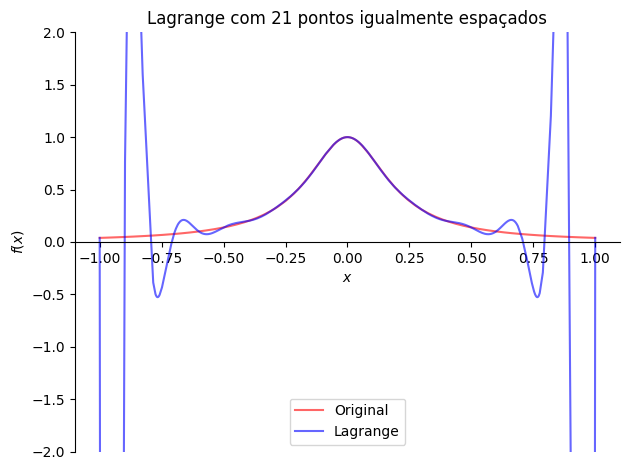

fxLagr = 260178.630971716*x**20 - 5.65705704502761e-10*x**19 - 1012094.87447999*x**18 - 5.0515154725872e-8*x**17 + 1639177.41084797*x**16 - 4.61186573375016e-8*x**15 - 1442944.96343911*x**14 + 1.83326847036369e-8*x**13 + 757287.092774897*x**12 + 1.80702954821754e-8*x**11 - 245249.283924502*x**10 + 8.02344857220305e-9*x**9 + 49317.5429129307*x**8 + 1.51713663854025e-9*x**7 - 6119.21994942123*x**6 + 1.00355279641917e-10*x**5 + 470.846226759443*x**4 + 3.784472735191e-14*x**3 - 24.1434796247811*x**2 - 4.99871411624442e-15*x + 1.0


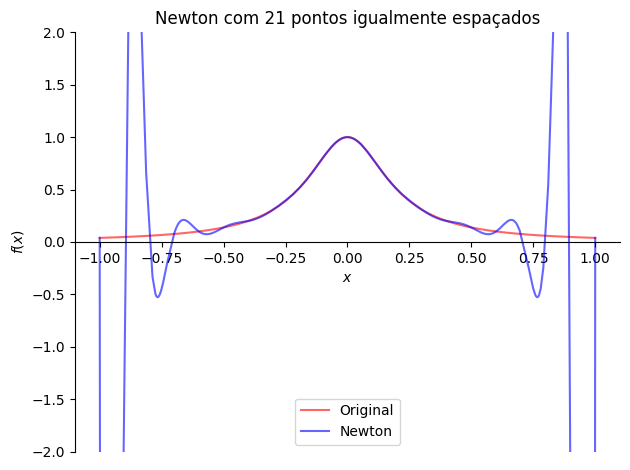

fxNewt = 260178.630971714*x**20 - 4.07453626394272e-10*x**19 - 1012094.87447997*x**18 - 6.98491930961609e-10*x**17 + 1639177.41084799*x**16 - 4.30736690759659e-9*x**15 - 1442944.96343925*x**14 + 2.91038304567337e-10*x**13 + 757287.092774897*x**12 - 6.98491930961609e-10*x**11 - 245249.283924508*x**10 + 4.07453626394272e-10*x**9 + 49317.5429129393*x**8 - 5.00222085975111e-12*x**7 - 6119.21994942141*x**6 + 4.2632564145606e-13*x**5 + 470.846226759446*x**4 - 7.19424519957101e-14*x**3 - 24.1434796247812*x**2 - 6.93889390390723e-18*x + 1.0


In [27]:
# Define a função original
x = sp.Symbol('x')
fx = 1/(1 + 25*x*x)

# Define os pontos de teste
xi = np.linspace(-1, 1, 21)

# Plota o gráfico com a forma de Lagrange
fxLagr = lagrangeInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [-2,2], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Lagrange com 21 pontos igualmente espaçados", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Lagrange", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxLagr = }')

# Plota o gráfico com a forma de Newton
fxNewt = newtonInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [-2,2], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Newton com 21 pontos igualmente espaçados", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Newton", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxNewt = }')

A aproximação para valores de $x$ próximos de $0$ ficam melhores enquanto o fenômeno de Runge começa a causar um maior erro de aproximação

### d)

**Usando a função *scipy.interpolate.interp1d* calcule a interpolação usando spline linear e cúbica. Exiba os gráficos e comente as diferenças das soluções deste item para os anteriores.**

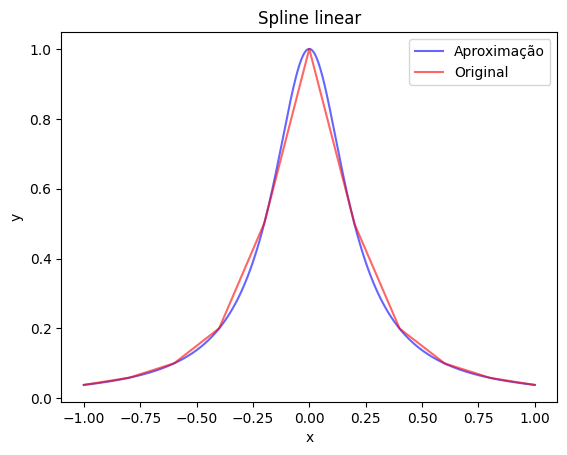

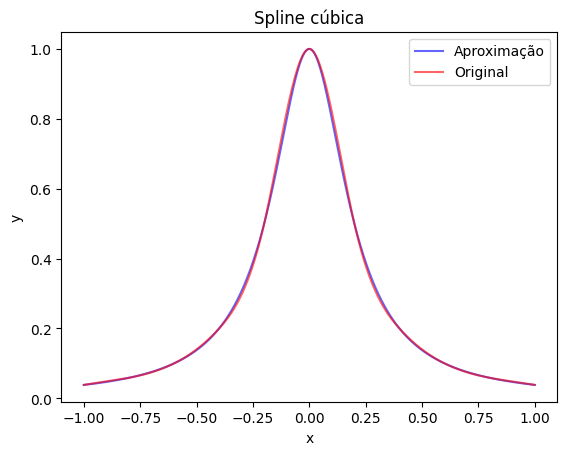

In [14]:
# Define a função original
x = sp.Symbol('x')
fx = 1/(1 + 25*x*x)

# Define os ponto de teste
xi = np.linspace(-1,1, 11)

# Define os pontos que serão usados para plotar os gráficos
xp = np.linspace(-1,1, 10001)

#### Interpolação com spline linear ####
fxScipy = interpolate.interp1d(xi, sp.lambdify(x, fx, 'scipy')(xi), kind="linear")

# Plota o gráfico
plt.plot(xp, sp.lambdify(x, fx, 'numpy')(xp), label="Aproximação", color="blue", alpha=0.6)
plt.plot(xp, fxScipy(xp), label="Original", color="red", alpha=0.6)

# Decora o gráfixo
plt.title("Spline linear")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### Interpolação com spline cúbica ####
fxScipy = interpolate.interp1d(xi, sp.lambdify(x, fx, 'scipy')(xi), kind="cubic")

# Plota o gráfico
plt.plot(xp, sp.lambdify(x, fx, 'numpy')(xp), label="Aproximação", color="blue", alpha=0.6)
plt.plot(xp, fxScipy(xp), color="red", label="Original", alpha=0.6)

# Decora o gráfico
plt.title("Spline cúbica")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

- Splines lineares aproximam da função original conectando os pontos da amostra por funções lineare (de grau 1), isso faz com que, para obter um bom resultado, seja necessário que se tenha uma amostragem com muitos pontos, o que não é muito eficiente, dado que para cada novo ponto é preciso armazenar uma função a mais para conectar os pontos.

- Splines cúbicas aproximam da função original conectando os pontos da amostra por funções cúbicas (de grau 3), isso faz com que seja possível encontrar uma boa aproximação com poucos pontos, no entanto, calcular uma função para conectar 2 pontos é mais custoso do que fazer o mesmo com spline linear.

### e)

Repita os itens b) e c) com nós de Chebyshev.

Os nós de Chebyshev são calculados da seguinte forma:

$$
    x_{i} = \frac{a+b}{2} + \frac{b-a}{2} \cos\left(\frac{2i+1}{2n+2} \pi\right)
    \text{, com } i = 0,1, \dots, n
$$

Sendo que $a$ representa o menor ponto da região que será aproximada e $b$ representa o maior ponto.

#### e.b)

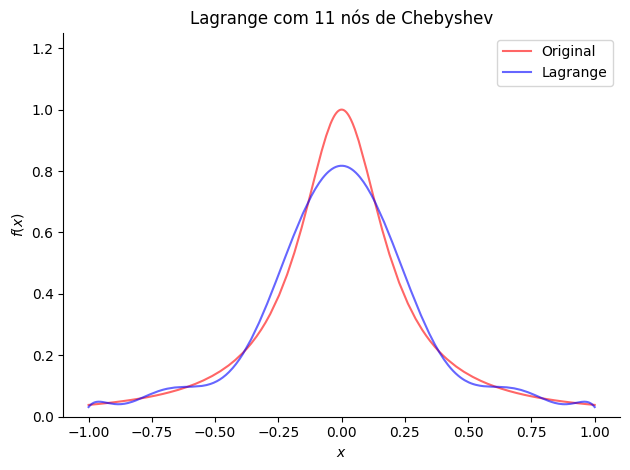

fxLagr = -14.9715584592799*x**10 - 1.27897692436818e-13*x**9 + 45.5135377162111*x**8 + 3.85469434149854e-13*x**7 - 52.3495513087185*x**6 - 4.89386309254769e-13*x**5 + 28.2942093560887*x**4 + 1.26981758441502e-14*x**3 - 7.27244664855761*x**2 - 5.33644309297365e-15*x + 0.817241718026367


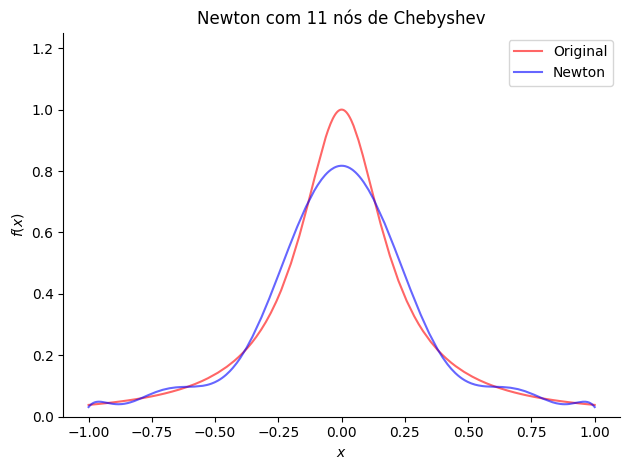

fxNewt = -14.9715584592799*x**10 - 8.88178419700125e-14*x**9 + 45.513537716211*x**8 + 1.35003119794419e-13*x**7 - 52.3495513087183*x**6 - 1.08357767203415e-13*x**5 + 28.2942093560887*x**4 + 4.19664303308309e-14*x**3 - 7.27244664855761*x**2 - 9.71445146547012e-16*x + 0.817241718026367


In [29]:
# Define a função original
x = sp.Symbol('x')
fx = 1/(1 + 25*x*x)

# Define os pontos de teste
xi = np.array([np.cos( ((2*i+1)/24) * np.pi) for i in np.arange(11)])

# Plota o gráfico com a forma de Lagrange
fxLagr = lagrangeInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [0,1.25], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Lagrange com 11 nós de Chebyshev", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Lagrange", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxLagr = }')

# Plota o gráfico com a forma de Newton
fxNewt = newtonInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [0,1.25], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Newton com 11 nós de Chebyshev", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Newton", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxNewt = }')

#### e.c)

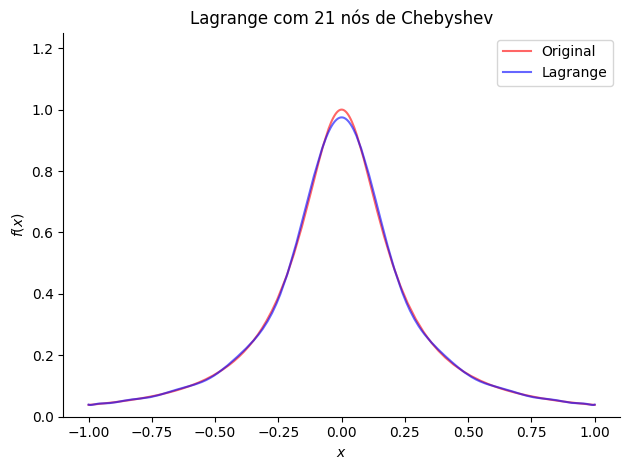

fxLagr = 2119.67924498408*x**20 - 4.57021087640896e-11*x**19 - 11743.0230172114*x**18 - 3.60614649252966e-9*x**17 + 28158.0310582926*x**16 - 2.41825546254404e-8*x**15 - 38286.9480059526*x**14 + 7.20046955393627e-9*x**13 + 32498.6668899499*x**12 + 3.74147930415347e-8*x**11 - 17876.5007711299*x**10 + 1.06616653283709e-8*x**9 + 6413.25050118591*x**8 + 8.07688138593221e-10*x**7 - 1477.57083512058*x**6 + 2.05950811960065e-11*x**5 + 211.732935288977*x**4 - 1.992572773446e-13*x**3 - 18.2532983015688*x**2 + 7.71767632440357e-15*x + 0.974731454312992


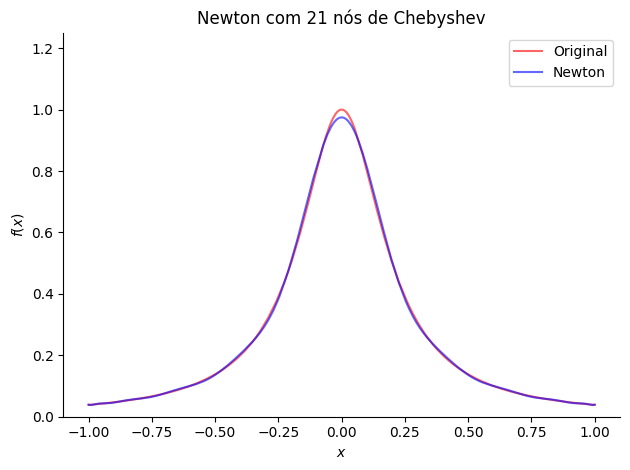

fxNewt = 2119.67924498404*x**20 + 1.81898940354586e-12*x**19 - 11743.0230172116*x**18 + 1.81898940354586e-11*x**17 + 28158.0310582925*x**16 + 8.73114913702011e-11*x**15 - 38286.9480059579*x**14 + 4.72937244921923e-11*x**13 + 32498.666889927*x**12 - 1.15505827125162e-10*x**11 - 17876.5007711364*x**10 + 1.31876731757075e-11*x**9 + 6413.25050118706*x**8 + 3.41060513164848e-13*x**7 - 1477.57083512068*x**6 - 1.00186525742174e-12*x**5 + 211.732935288978*x**4 - 3.99680288865056e-15*x**3 - 18.2532983015687*x**2 - 2.96334137783738e-15*x + 0.974731454312991


In [30]:
# Define a função original
x = sp.Symbol('x')
fx = 1/(1 + 25*x*x)

# Define os pontos de teste
xi = np.array([np.cos( ((2*i+1)/44) * np.pi) for i in np.arange(21)])

# Plota o gráfico com a forma de Lagrange
fxLagr = lagrangeInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [0,1.25], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Lagrange com 21 nós de Chebyshev", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Lagrange", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxLagr = }')

# Plota o gráfico com a forma de Newton
fxNewt = newtonInter(xi, sp.lambdify(x, fx, 'numpy')(xi))
plotf = spplot(fx, (x, -1, 1),ylim = [0,1.25], label="Original", line_color=(1,0,0,0.6), axis_center=(-1.1,0), title="Newton com 21 nós de Chebyshev", show=False, legend=True)
plotf.extend(spplot(fxLagr, (x, -1, 1), label="Newton", line_color=(0,0,1,0.6), show=False))
plotf.show()
print(f'{fxNewt = }')

# Mínimos Quadrados

**Vamos supor que os casos acumulados de Covid-19, no período inicial da pandemia, de 26 de fevereiro de 2020 a 18 de junho de 2020 são dados em casosacumuladosbrasilatuaizado.txt. O objetivo deste exercício é estudar o ajuste dos dados, no sentido dos mínimos quadrados, a uma função $g(x)=a b^{x}$, com $a, b \in \mathbb{R}$. Vamos utilizar os códigos implementados em aula:**

In [17]:
dados = np.array([1, 1, 1, 2, 2, 2, 2, 3, 7, 13, 19, 25, 25, 34, 52, 77, 98, 121, 200, 234, 291, 428, 621, 904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3903, 4256, 4579, 5717, 6834, 7910, 9056, 10278, 11130, 12056, 13717, 15927, 17857, 19638, 20727, 22169, 23430, 25262, 28320, 30425, 33682, 36599, 38654, 40581, 43079, 45757, 49492, 52995, 58509, 61888, 66501, 71886, 78162, 85380, 91299, 96396, 101147, 107780, 114715, 125218, 135106, 145328, 155939, 162699, 168331, 177589, 188974, 202918, 218223, 233142, 241080, 254220, 271628, 291579, 310087, 330890, 347398, 363211, 374898, 391222, 411821, 438238, 465166, 498440, 514200, 526447, 555383, 584016, 614941, 645771, 672846, 691758, 707412, 739503, 772416, 802828, 828810, 850514, 867624, 888271, 923189, 955377, 978142, 1032913, 1067579, 1085038, 1106470])

In [18]:
def mmq(x, y, k) :
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a
    
def mmq_QR(x, y, k) :
    X = np.vander(x, k)
    (Q,R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y)
    a = np.linalg.solve(R, b)
    return a

### a)

**Explique cada um dos códigos dados acima. O que está sendo calculado?**

Em ambos os códigos está sendo calculado o método dos mínimos quadrados, que é uma aproximação de uma função polinomial com base em pontos de amostra.

```python
1| def mmq(x, y, k) :
2|     X = np.vander(x, k)
3|     A = np.transpose(X).dot(X)
4|     b = np.transpose(X).dot(y)
5|     a = np.linalg.solve(A, b)
6|     return a
```

- **Linha 1:** A função é definida com os parâmetros\
    ***x:*** valores para *x* dos dados da amostra\
    ***y:*** valores para *y* dos dados da amostra\
    ***k:*** tamanho da matriz de Vandermonde

- **Linha 2:** Cria uma matriz de Vandermon de com *k* colunas (grau do polinômio - 1)

- **Linha 3:** É criada a matriz *A*, que representa o sistema de equações normais do método dos mínimos quadrados

- **Linha 4:** É criado o vetor *b*, que é uma combinação linear das colunas de X ponderadas pelos valores de y

- **Linha 5:** Encontra a solução para o sistema, que é a aproximação para a função

- **Linha 6:** Retorna a aproximação da função gerada pelo método.

```python
1| def mmq_QR(x, y, k) :
2|     X = np.vander(x, k)
3|     (Q,R) = np.linalg.qr(X)
4|     b = np.transpose(Q).dot(y)
5|     a = np.linalg.solve(R, b)
6|     return a
```

- **Linha 1:** A função é definida com os parâmetros\
    ***x:*** valores para *x* dos dados da amostra\
    ***y:*** valores para *y* dos dados da amostra\
    ***k:*** tamanho da matriz de Vandermonde

- **Linha 2:** Cria uma matriz de Vandermon de com *k* colunas (grau do polinômio - 1)

- **Linha 3:** Encontra a decomposição QR da matriz de Vandermonde, usada para facilitar a resolução do sistema da linha 5

- **Linha 4:** Cria uma projeção de *y* no espaço coluna de Q

- **Linha 5:** Encontra a solução para o sistema, que é a aproximação para a função

- **Linha 6:** Retorna a aproximação da função gerada pelo método.

### b)

**Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(x)=a b^{x}$, com $a, b \in \mathbb{R}$. Use um dos códigos dados acima.**

Para aproximar os dados de uma função $g(x) = ab^{x}$ é possível primeiramente tirar o logaritmo de ambos os lados da equação, feito isso será encontrado a seguinte equação

$$

\underbrace{\ln(f(x))}_{F(x)} \approx \underbrace{\ln(a)}_{\alpha^{*}_{0}} \underbrace{1}_{\phi_{0}} + \underbrace{\ln(b)}_{\alpha^{*}_{1}} \underbrace{x}_{\phi_{1}}

$$

Resolvendo o mmq para esses valores é possível descobrir os valores de *a* e *b* que são:

$$

a = e^{\alpha^{*}_{0}}\ \text{ e }\ b = e^{\alpha^{*}_{1}}

$$

35.313041543173*1.11135201773972**x


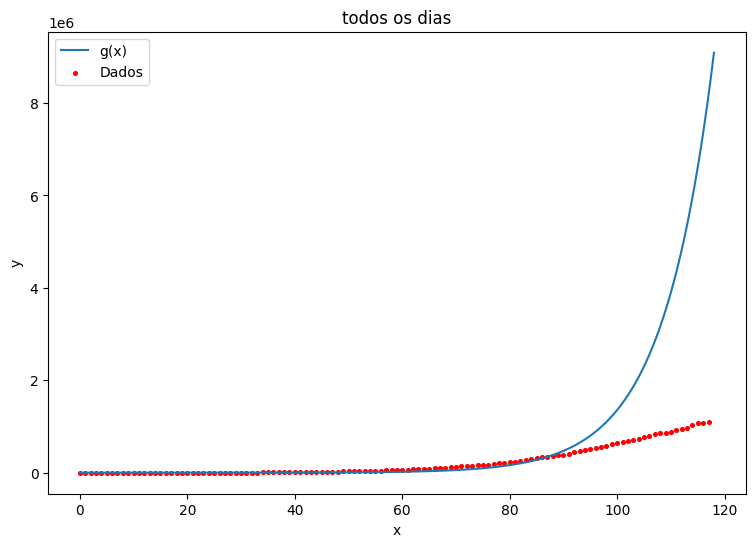

In [19]:
# Define quais dados serão usados para o mmq
# E calcula o ln dos valores dos dados para fazer a aproximação
yi = np.log(dados)
xi = np.arange(len(yi))

# Efetua o método dos mínimos quadrados
ap = mmq(xi, yi, 2)

# Define a função
x = sp.Symbol('x')
gx = np.exp(ap[1]) * (np.exp(ap[0]) ** x)
print(gx)

# Plota o gráfico
xi = np.linspace(0, len(dados), 10001)
plt.figure(figsize=(9,6))
plt.plot(xi, sp.lambdify(x, gx, 'numpy')(xi), label='g(x)')
plt.scatter(np.arange(len(dados)), dados, s = 7, color='red', label='Dados')

# Decora o gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title("todos os dias")
plt.legend()
plt.show()

### c)

**Repita o ítem b) usando apenas os 20 primeiros dias.**

0.59654141876601*1.37171825494177**x


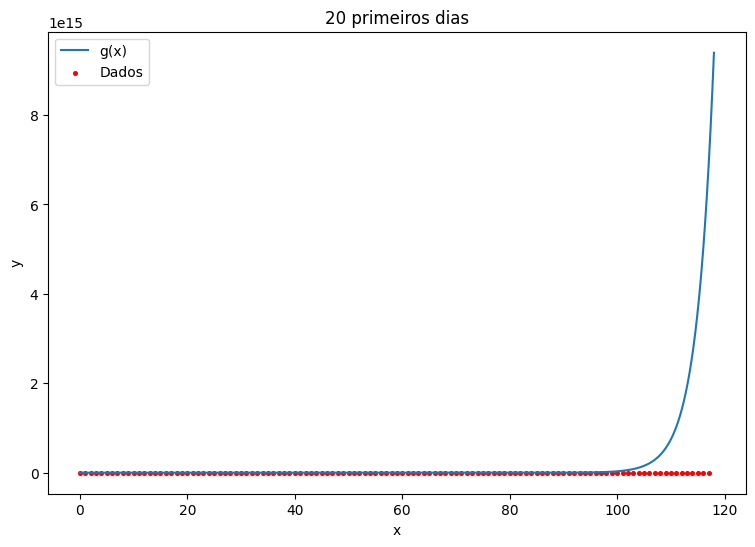

In [20]:
# Define quais dados serão usados para o mmq
# E calcula o ln dos valores dos dados para fazer a aproximação
yi = np.log(dados[:20])
xi = np.arange(len(yi))

# Efetua o método dos mínimos quadrados
ap = mmq(xi, yi, 2)

# Define a função
x = sp.Symbol('x')
gx = np.exp(ap[1]) * (np.exp(ap[0]) ** x)
print(gx)

# Plota o gráfico
xi = np.linspace(0, len(dados), 10001)
plt.figure(figsize=(9,6))
plt.plot(xi, sp.lambdify(x, gx, 'numpy')(xi), label='g(x)')
plt.scatter(np.arange(len(dados)), dados, s = 7, color='red', label='Dados')

# Decora o gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title("20 primeiros dias")
plt.legend()
plt.show()

### d)

**Repita o ítem b) usando apenas os 50 últimos dias.**

5027.40252044604*1.04879087432526**x


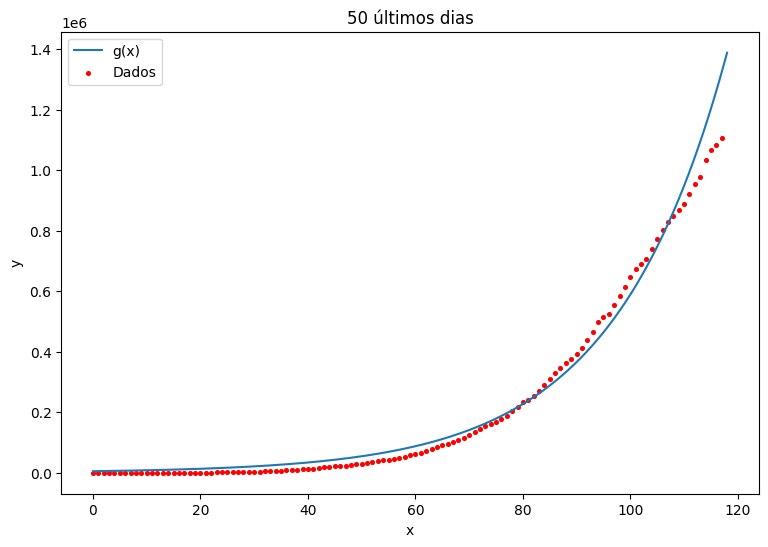

In [21]:
# Define quais dados serão usados para o mmq
# E calcula o ln dos valores dos dados para fazer a aproximação
yi = np.log(dados[len(dados)-50:])
xi = np.arange(len(dados)-50, len(dados))

# Efetua o método dos mínimos quadrados
ap = mmq(xi, yi, 2)

# Define a função
x = sp.Symbol('x')
gx = np.exp(ap[1]) * (np.exp(ap[0]) ** x)
print(gx)

# Plota o gráfico
xi = np.linspace(0, len(dados), 10001)
plt.figure(figsize=(9,6))
plt.plot(xi, sp.lambdify(x, gx, 'numpy')(xi), label='g(x)')
plt.scatter(np.arange(len(dados)), dados, s = 7, color='red', label='Dados')

# Decora o gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title("50 últimos dias")
plt.legend()
plt.show()

### e)

**Compare os ítens b), c) e d). Que tipo de informação os dados nos fornecem?**

É possível perceber que quando foram selecionados apenas os 20 primeiros dias, a função ficou muito imprecisa para os dados dos dias finais, isso ocorre por dois fatores:\
    - Não possuir dados o suficiente para "inferir" como que a função deve se comportar no restante dos dias\
    - Os pontos da amostra possuem valores muito próximos.


Quando utilizou todos os dias para realizar as contas, o resultado se aproximou bastante do correto para os dias iniciais, no entanto, ao chegar nos últimos dias, ele começou a apresentar erros significativos\
    - Muitos dos pontos iniciais possuem valores próximos, por serem numerosos eles tiveram muito peso no resultado final

O cálculo com os 50 dias finais apresentou o melhor resultado\
    - Por utilizar apenas os pontos que possuiam a maior diferença de valores entre eles evitou-se que alguns valores tivessem muito peso no valor final.